# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fransiscus Xaverius Surya Darmawan]
- **Email:** [m320b4ky1551@bangkit.academy]
- **ID Dicoding:** [fxsurya27]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh dari kondisi cuaca dan musim terhadap jumlah penyewaan sepeda ?
- Bagaimana pengaruh dari penggunaan sepeda pada hari kerja dan akhir pekan ?
- Bagaimana performa penyewaan sepeda dari tahun 2011 hingga 2012 ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca file day.csv kemudian diload datanya

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membaca file hour.csv kemudian diload datanya

In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv = memberikan gambaran tentang penyewaan sepeda periode waktu hari
- hour.csv = memberikan gambar tentang penyewaan sepeda periode waktu jam

### Assessing Data

Mengecek tipe data dari tiap kolom pada file day.csv

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek tipe data dari tiap kolom pada file hour.csv

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menampilkan jumlah missing values dari tiap kolom pada file day.csv

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengecek duplikasi data pada file day.csv

In [7]:
print(f"Jumlah duplikasi : {day_df.duplicated().sum()}")

Jumlah duplikasi : 0


Menampilkan jumlah missing values dari tiap kolom pada file hour.csv

In [8]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Mengecek duplikasi data pada file hour.csv

In [9]:
print(f"Jumlah duplikasi : {hour_df.duplicated().sum()}")

Jumlah duplikasi : 0


Menampilkan ringkasan parameter statistik pada file day.csv

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menampilkan ringkasan parameter statistik pada file hour.csv

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada nilai yang duplikat karena menghasilkan 0
- Missing values menghasilkan 0, sehingga tidak ada nilai yang hilang

### Cleaning Data

Memastikan kembali supaya tidak ada data yang duplikasi pada file day.csv

In [12]:
day_df.drop_duplicates(inplace=True)

print(f"Jumlah duplikasi : {day_df.duplicated().sum()}")

Jumlah duplikasi : 0


Memastikan kembali supaya tidak ada data yang duplikasi pada file hour.csv

In [13]:
hour_df.drop_duplicates(inplace=True)

print(f"Jumlah duplikasi : {hour_df.duplicated().sum()}")

Jumlah duplikasi : 0


Dikarenakan tidak ada nilai yang hilang, maka tidak ada kolom yang perlu ditangani pada file day.csv dan hour.csv

In [14]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [15]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Disini saya mengecek nilai max dan min dari suatu kolom yang rawan terjadinya salah input, untuk menghindarkan human error yang salah input pada file day.csv

In [16]:
day_df[day_df.temp == day_df.temp.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840


In [17]:
day_df[day_df.temp == day_df.temp.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
21,22,2011-01-22,1,0,1,0,6,0,1,0.05913,0.07907,0.4,0.17197,93,888,981


In [18]:
day_df[day_df.atemp == day_df.atemp.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
202,203,2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.1331,562,2825,3387


In [19]:
day_df[day_df.atemp == day_df.atemp.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
21,22,2011-01-22,1,0,1,0,6,0,1,0.05913,0.07907,0.4,0.17197,93,888,981


In [20]:
day_df[day_df.hum == day_df.hum.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
265,266,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.9725,0.078367,258,2137,2395


In [21]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [22]:
day_df[day_df.weathersit == day_df.weathersit.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


In [23]:
day_df[day_df.weathersit == day_df.weathersit.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
718,719,2012-12-19,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787


In [24]:
day_df[day_df.windspeed == day_df.windspeed.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


In [25]:
day_df[day_df.windspeed == day_df.windspeed.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
279,280,2011-10-07,4,0,10,0,5,1,1,0.510833,0.504404,0.684167,0.022392,949,4036,4985


In [26]:
day_df[day_df.weekday == day_df.weekday.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248
21,22,2011-01-22,1,0,1,0,6,0,1,0.059130,0.079070,0.400000,0.171970,93,888,981
28,29,2011-01-29,1,0,1,0,6,0,1,0.196522,0.212126,0.651739,0.145365,123,975,1098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,2012-12-01,4,1,12,0,6,0,2,0.298333,0.316904,0.806667,0.059704,951,4240,5191
707,708,2012-12-08,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,1153,4429,5582
714,715,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,767,4280,5047
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749


In [27]:
day_df[day_df.weekday == day_df.weekday.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
15,16,2011-01-16,1,0,1,0,0,0,1,0.231667,0.234217,0.483750,0.188433,251,953,1204
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986
29,30,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,956,1096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,702,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787


Disini saya mengecek nilai max dan min dari suatu kolom yang rawan terjadinya salah input, untuk menghindarkan human error yang salah input pada file hour.csv

In [28]:
hour_df[hour_df.temp == hour_df.temp.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13163,13164,2012-07-07,3,1,7,16,0,6,0,1,1.0,0.8636,0.19,0.1642,102,192,294


In [29]:
hour_df[hour_df.temp == hour_df.temp.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
483,484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
484,485,2011-01-22,1,0,1,6,0,6,0,2,0.02,0.0303,0.44,0.2239,0,2,2
485,486,2011-01-22,1,0,1,7,0,6,0,1,0.02,0.0152,0.44,0.2836,0,8,8
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0000,0.44,0.3284,1,26,27
504,505,2011-01-23,1,0,1,2,0,0,0,1,0.02,0.0606,0.62,0.1343,3,15,18
505,506,2011-01-23,1,0,1,3,0,0,0,1,0.02,0.0606,0.62,0.1343,1,4,5
528,529,2011-01-24,1,0,1,4,0,1,1,1,0.02,0.0606,0.48,0.1343,0,1,1
529,530,2011-01-24,1,0,1,5,0,1,1,1,0.02,0.0606,0.48,0.1343,0,5,5
530,531,2011-01-24,1,0,1,6,0,1,1,1,0.02,0.0758,0.48,0.0896,0,15,15
531,532,2011-01-24,1,0,1,7,0,1,1,1,0.02,0.1212,0.48,0.0000,5,79,84


In [30]:
hour_df[hour_df.atemp == hour_df.atemp.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4768,4769,2011-07-22,3,0,7,14,0,5,1,1,0.96,1.0,0.48,0.2985,24,77,101


In [31]:
hour_df[hour_df.atemp == hour_df.atemp.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0,0.41,0.3881,3,9,12
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0,0.44,0.3284,1,26,27


In [32]:
hour_df[hour_df.hum == hour_df.hum.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
26,27,2011-01-02,1,0,1,2,0,0,0,2,0.42,0.4242,1.0,0.2836,1,8,9
721,722,2011-02-02,1,0,2,10,0,3,1,2,0.22,0.2727,1.0,0.0000,2,59,61
786,787,2011-02-05,1,0,2,5,0,6,0,3,0.20,0.2273,1.0,0.0896,0,9,9
787,788,2011-02-05,1,0,2,6,0,6,0,3,0.20,0.2576,1.0,0.0000,0,4,4
789,790,2011-02-05,1,0,2,8,0,6,0,3,0.20,0.2273,1.0,0.0896,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16865,16866,2012-12-10,4,1,12,12,0,1,1,3,0.44,0.4394,1.0,0.2239,23,150,173
16866,16867,2012-12-10,4,1,12,13,0,1,1,3,0.44,0.4394,1.0,0.2239,30,190,220
17025,17026,2012-12-17,4,1,12,4,0,1,1,3,0.36,0.3788,1.0,0.0000,2,3,5
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.0,0.0000,5,43,48


In [33]:
hour_df[hour_df.hum == hour_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [34]:
hour_df[hour_df.weathersit == hour_df.weathersit.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


In [35]:
hour_df[hour_df.weathersit == hour_df.weathersit.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362,17363,2012-12-31,1,1,12,7,0,1,1,1,0.16,0.1818,0.64,0.1343,2,83,85
17363,17364,2012-12-31,1,1,12,8,0,1,1,1,0.14,0.1515,0.69,0.1343,9,187,196
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [36]:
hour_df[hour_df.windspeed == hour_df.windspeed.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4315,4316,2011-07-03,3,0,7,17,0,0,0,3,0.8,0.7424,0.49,0.8507,181,177,358
4316,4317,2011-07-03,3,0,7,18,0,0,0,3,0.8,0.7424,0.49,0.8507,74,107,181


In [37]:
hour_df[hour_df.windspeed == hour_df.windspeed.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


In [38]:
hour_df[hour_df.weekday == hour_df.weekday.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17326,17327,2012-12-29,1,1,12,19,0,6,0,2,0.30,0.2424,0.61,0.2537,7,90,97
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17329,17330,2012-12-29,1,1,12,22,0,6,0,2,0.26,0.2424,0.60,0.4627,3,51,54


In [39]:
hour_df[hour_df.weekday == hour_df.weekday.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
24,25,2011-01-02,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17
25,26,2011-01-02,1,0,1,1,0,0,0,2,0.44,0.4394,0.94,0.2537,1,16,17
26,27,2011-01-02,1,0,1,2,0,0,0,2,0.42,0.4242,1.00,0.2836,1,8,9
27,28,2011-01-02,1,0,1,3,0,0,0,2,0.46,0.4545,0.94,0.1940,2,4,6
28,29,2011-01-02,1,0,1,4,0,0,0,2,0.46,0.4545,0.94,0.1940,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,17351,2012-12-30,1,1,12,19,0,0,0,1,0.34,0.3636,0.61,0.0000,16,86,102
17351,17352,2012-12-30,1,1,12,20,0,0,0,1,0.22,0.1970,0.47,0.3284,9,63,72
17352,17353,2012-12-30,1,1,12,21,0,0,0,1,0.20,0.2121,0.51,0.1642,5,42,47
17353,17354,2012-12-30,1,1,12,22,0,0,0,1,0.20,0.1970,0.55,0.1940,6,30,36


Kemudian setelah saya cek bagian readme file, bahwa kolom dteday = date, sedangkan saat di cek dengan .info(), hasil dteday = object, sehingga perlu diperbaiki menjadi date

In [40]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

Selain itu ada tipe data yang perlu diperbaiki yakni season, holiday, weekday, workingday, weathersit untuk diubah dari int menjadi category

In [41]:
columns = ["season","mnth","holiday","weekday","workingday","weathersit"]

for column in columns:
  day_df[column] = day_df[column].astype("category")
  hour_df[column] = hour_df[column].astype("category")

In [42]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [43]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Kita perlu mengganti nama kolom pada dataset, supaya mudah dibaca oleh pengguna lainnya

In [44]:
name_columns = {
    'mnth' : 'month',
    'weathersit' : 'weather_situation',
    'hr' : 'hour',
    'yr' : 'year',
    'hum' : 'humidity',
    'mtnh' : 'month',
    'cnt': 'total_rentals_bikes',
    'registered' : 'registered_users'
}

day_df.rename(columns = name_columns, inplace=True)

In [45]:
name_columns = {
    'mnth' : 'month',
    'weathersit' : 'weather_situation',
    'hr' : 'hour',
    'yr' : 'year',
    'hum' : 'humidity',
    'mtnh' : 'month',
    'cnt': 'total_rentals_bikes',
    'registered' : 'registered_users'
}

hour_df.rename(columns = name_columns, inplace=True)

Kita perlu mengubah format yang awalnya numerik menjadi konversi string sesuai dengan di file readme, contoh Summer, Fall, dan lainnya

In [46]:
season_new = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

month_new = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

day_new = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

year_new = {
    0: 2011,
    1: 2012
}

weather_new = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow',
    4: 'Heavy Rain'
}

day_df['month'] = day_df['month'].map(month_new)
hour_df['month'] = hour_df['month'].map(month_new)

day_df['season'] = day_df['season'].map(season_new)
hour_df['season'] = hour_df['season'].map(season_new)

day_df['weekday'] = day_df['weekday'].map(day_new)
hour_df['weekday'] = hour_df['weekday'].map(day_new)

day_df['year'] = day_df['year'].map(year_new)
hour_df['year'] = hour_df['year'].map(year_new)

day_df['weather_situation'] = day_df['weather_situation'].map(weather_new)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_new)

In [47]:
print(day_df[['month']])

        month
0     January
1     January
2     January
3     January
4     January
..        ...
726  December
727  December
728  December
729  December
730  December

[731 rows x 1 columns]


In [48]:
print(hour_df[['month']])

          month
0       January
1       January
2       January
3       January
4       January
...         ...
17374  December
17375  December
17376  December
17377  December
17378  December

[17379 rows x 1 columns]


In [49]:
print(day_df[['season']])

       season
0    Springer
1    Springer
2    Springer
3    Springer
4    Springer
..        ...
726  Springer
727  Springer
728  Springer
729  Springer
730  Springer

[731 rows x 1 columns]


In [50]:
print(hour_df[['season']])

         season
0      Springer
1      Springer
2      Springer
3      Springer
4      Springer
...         ...
17374  Springer
17375  Springer
17376  Springer
17377  Springer
17378  Springer

[17379 rows x 1 columns]


In [51]:
print(day_df[['weekday']])

       weekday
0     Saturday
1       Sunday
2       Monday
3      Tuesday
4    Wednesday
..         ...
726   Thursday
727     Friday
728   Saturday
729     Sunday
730     Monday

[731 rows x 1 columns]


In [52]:
print(hour_df[['weekday']])

        weekday
0      Saturday
1      Saturday
2      Saturday
3      Saturday
4      Saturday
...         ...
17374    Monday
17375    Monday
17376    Monday
17377    Monday
17378    Monday

[17379 rows x 1 columns]


In [53]:
print(day_df[['year']])

     year
0    2011
1    2011
2    2011
3    2011
4    2011
..    ...
726  2012
727  2012
728  2012
729  2012
730  2012

[731 rows x 1 columns]


In [54]:
print(hour_df[['year']])

       year
0      2011
1      2011
2      2011
3      2011
4      2011
...     ...
17374  2012
17375  2012
17376  2012
17377  2012
17378  2012

[17379 rows x 1 columns]


In [55]:
print(day_df[['weather_situation']])

    weather_situation
0                Mist
1                Mist
2               Clear
3               Clear
4               Clear
..                ...
726              Mist
727              Mist
728              Mist
729             Clear
730              Mist

[731 rows x 1 columns]


In [56]:
print(hour_df[['weather_situation']])

      weather_situation
0                 Clear
1                 Clear
2                 Clear
3                 Clear
4                 Clear
...                 ...
17374              Mist
17375              Mist
17376             Clear
17377             Clear
17378             Clear

[17379 rows x 1 columns]


**Insight:**
- Sudah di cek untuk memastikan tidak ada yang duplikat
- Pengecekan nilai maksimum dan minimum pada beberapa kolom yang rawan kesalahan input, sehingga masih direntang nilai yang dibutuhkan
- Mengubah tipe data beberapa kolom supaya sesuai dan efisien
- Mengganti nama kolom untuk memperjelas informasi yang ditampilkan kepada user
- Mengubah isi dengan konversi dari numerik sesuai dengan isi file di readme untuk memperjelas informasi


## Exploratory Data Analysis (EDA)

Melihat rangkuman parameter statistik pada day.csv

In [57]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered_users,total_rentals_bikes
count,731.000000,731,731,731.000000,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,0.0,Sunday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat rangkuman parameter statistik pada hour.csv

In [58]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered_users,total_rentals_bikes
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mengelompokkan berdasarkan weekday dan menghitung jumlah total dari total rentals bikes pada file day.csv

In [59]:
day_df.groupby(by="weekday")['total_rentals_bikes'].sum().sort_values(ascending=False)

<ipython-input-59-2b9b906ed30b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weekday")['total_rentals_bikes'].sum().sort_values(ascending=False)


,total_rentals_bikes
weekday,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


Mengelompokkan berdasarkan weekday dan menghitung jumlah total dari total rentals bikes pada file hour.csv

In [60]:
hour_df.groupby(by="weekday")['total_rentals_bikes'].sum().sort_values(ascending=False)

<ipython-input-60-5748967b8b8c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weekday")['total_rentals_bikes'].sum().sort_values(ascending=False)


,total_rentals_bikes
weekday,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


Mengelompokkan berdasarkan weekday dan mengetahui rata rata dari total rentals bikes pada file day.csv

In [61]:
day_df.groupby('weekday')['total_rentals_bikes'].mean().sort_values(ascending=True)

<ipython-input-61-9d5b17f9010c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weekday')['total_rentals_bikes'].mean().sort_values(ascending=True)


,total_rentals_bikes
weekday,
Sunday,4228.828571
Monday,4338.123810
Tuesday,4510.663462
Wednesday,4548.538462
Saturday,4550.542857
Thursday,4667.259615
Friday,4690.288462


Mengelompokkan berdasarkan weekday dan mengetahui rata rata dari total rentals bikes pada file hour.csv

In [62]:
hour_df.groupby('weekday')['total_rentals_bikes'].mean().sort_values(ascending=True)

<ipython-input-62-8fb0c59d2f43>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('weekday')['total_rentals_bikes'].mean().sort_values(ascending=True)


,total_rentals_bikes
weekday,
Sunday,177.468825
Monday,183.744655
Saturday,190.209793
Wednesday,191.130505
Tuesday,191.238891
Friday,196.135907
Thursday,196.436665


Mengelompokkan berdasarkan season dan menghitung jumlah total dari total rentals bikes pada file day.csv

In [63]:
day_df.groupby(by="season")['total_rentals_bikes'].sum().sort_values(ascending=False)

<ipython-input-63-da962d686a9b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season")['total_rentals_bikes'].sum().sort_values(ascending=False)


,total_rentals_bikes
season,
Fall,1061129
Summer,918589
Winter,841613
Springer,471348


Mengelompokkan berdasarkan season dan menghitung jumlah total dari total rentals bikes pada file hour.csv

In [64]:
hour_df.groupby(by="season")['total_rentals_bikes'].sum().sort_values(ascending=False)

<ipython-input-64-7da2020053ec>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="season")['total_rentals_bikes'].sum().sort_values(ascending=False)


,total_rentals_bikes
season,
Fall,1061129
Summer,918589
Winter,841613
Springer,471348


Mengelompokkan berdasarkan penyewaan sepeda di hari kerja dan bukan hari kerja

In [65]:
day_df.groupby('workingday')['total_rentals_bikes'].mean()

<ipython-input-65-72ed24a25ba3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('workingday')['total_rentals_bikes'].mean()


,total_rentals_bikes
workingday,
0,4330.168831
1,4584.820000


In [66]:
day_df.groupby('workingday')['total_rentals_bikes'].sum()

<ipython-input-66-53a3783d4b21>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('workingday')['total_rentals_bikes'].sum()


,total_rentals_bikes
workingday,
0,1000269
1,2292410


In [67]:
hour_df.groupby('workingday')['total_rentals_bikes'].mean()

<ipython-input-67-fb1f4847cefc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('workingday')['total_rentals_bikes'].mean()


,total_rentals_bikes
workingday,
0,181.405332
1,193.207754


In [68]:
hour_df.groupby('workingday')['total_rentals_bikes'].sum()

<ipython-input-68-23ff5fe610a3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('workingday')['total_rentals_bikes'].sum()


,total_rentals_bikes
workingday,
0,1000269
1,2292410


Mengelompokkan berdasarkan season dan siatuasi cuaca kemudian dihitung rata rata penyewaan bike

In [69]:
day_df.groupby(['season', 'weather_situation'])['total_rentals_bikes'].mean()

<ipython-input-69-1fa4c56a2ce7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(['season', 'weather_situation'])['total_rentals_bikes'].mean()


season    weather_situation
Springer  Clear                2811.135135
          Mist                 2357.166667
          Light Snow            934.750000
Summer    Clear                5548.548673
          Mist                 4236.705882
          Light Snow           1169.000000
Fall      Clear                5878.257353
          Mist                 5222.479167
          Light Snow           2751.750000
Winter    Clear                5043.563107
          Mist                 4654.000000
          Light Snow           1961.600000
Name: total_rentals_bikes, dtype: float64

In [70]:
hour_df.groupby(['season', 'weather_situation'])['total_rentals_bikes'].mean()

<ipython-input-70-425e98888cf1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(['season', 'weather_situation'])['total_rentals_bikes'].mean()


season    weather_situation
Springer  Clear                122.055535
          Mist                 103.074689
          Light Snow            58.650407
          Heavy Rain            74.333333
Summer    Clear                232.410983
          Mist                 181.261364
          Light Snow           115.179803
          Heavy Rain                  NaN
Fall      Clear                244.494207
          Mist                 224.848997
          Light Snow           171.955390
          Heavy Rain                  NaN
Winter    Clear                209.463779
          Mist                 201.483974
          Light Snow           116.453333
          Heavy Rain                  NaN
Name: total_rentals_bikes, dtype: float64

Mengelompokkan berdasarkan tahun dan menghitung jumlah total dari total rentals bikes pada file day.csv

In [71]:
day_df.groupby(by="year")['total_rentals_bikes'].sum().sort_values(ascending=False)

,total_rentals_bikes
year,
2012,2049576
2011,1243103


Mengelompokkan berdasarkan tahun dan menghitung jumlah total dari total rentals bikes pada file hour.csv

In [72]:
hour_df.groupby(by="year")['total_rentals_bikes'].sum().sort_values(ascending=False)

,total_rentals_bikes
year,
2012,2049576
2011,1243103


Mengelompokkan data dari tiap bulan pada tahun 2011 dan 2012

In [73]:
day_df.groupby(['year', 'month'])['total_rentals_bikes'].mean()

<ipython-input-73-25afeb717a62>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(['year', 'month'])['total_rentals_bikes'].mean()


year  month    
2011  January      1231.903226
      February     1721.964286
      March        2065.967742
      April        3162.333333
      May          4381.322581
      June         4783.733333
      July         4559.387097
      August       4409.387097
      September    4247.266667
      October      3984.225806
      November     3405.566667
      December     2816.870968
2012  January      3120.774194
      February     3556.448276
      March        5318.548387
      April        5807.466667
      May          6318.225806
      June         6761.000000
      July         6567.967742
      August       6919.451613
      September    7285.766667
      October      6414.225806
      November     5088.800000
      December     3990.741935
Name: total_rentals_bikes, dtype: float64

In [74]:
hour_df.groupby(['year', 'month'])['total_rentals_bikes'].mean()

<ipython-input-74-a7182ddea992>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(['year', 'month'])['total_rentals_bikes'].mean()


year  month    
2011  January       55.507267
      February      74.291217
      March         87.732877
      April        131.947149
      May          182.555108
      June         199.322222
      July         189.974462
      August       186.991792
      September    177.709902
      October      166.232840
      November     142.095967
      December     117.844804
2012  January      130.558704
      February     149.041908
      March        221.904441
      April        242.651811
      May          263.259409
      June         281.708333
      July         273.665323
      August       288.310484
      September    303.573611
      October      280.848870
      November     212.623955
      December     166.729111
Name: total_rentals_bikes, dtype: float64

**Insight:**
- Kita bisa melihat keseluruhan rangkuman parameter statistic
- Mengelompokkan berdasarkan weekday dengan penyewaan bike
- Mengelompokkan berdasarkan season dengan penyewaan bike
- Mengelompokkan hari kerja atau tidak weekday dengan penyewaan bike
- Mengelompokkan berdasarkan season dan kondisi cuaca dengan penyewaan bike
- Mengelompokkan berdasarkan tahun 2011 dan 2012 dengan penyewaan bike
- Mengelompokkan berdasarkan tahun dan bulan di setiap tahun tersebut dengan penyewaan bike

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh dari kondisi cuaca dan musim terhadap jumlah penyewaan sepeda ?

Bar chart dengan mengelompokkan berdasarkan season dengan total penyewaan sepeda, kemudian ditampilkan dengan rata rata dari penyewaan sepeda

<ipython-input-75-ba4dd3aa9453>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_season = day_df.groupby('season')['total_rentals_bikes'].mean().reset_index()


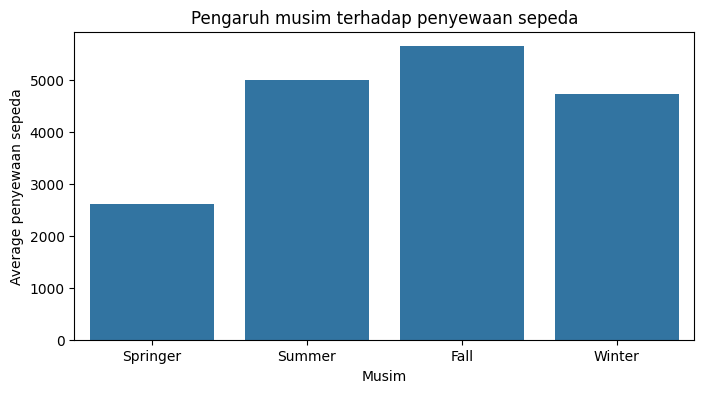

In [75]:
grouped_season = day_df.groupby('season')['total_rentals_bikes'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='season', y='total_rentals_bikes', data=grouped_season)
plt.title('Pengaruh musim terhadap penyewaan sepeda')
plt.xlabel('Musim')
plt.ylabel('Average penyewaan sepeda')
plt.xticks([0, 1, 2, 3], ['Springer', 'Summer', 'Fall', 'Winter'])
plt.show()

Pie chart dengan mengelompokkan berdasarkan season dengan total penyewaan sepeda

<ipython-input-76-a5e3ed65ad91>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_season_pie = day_df.groupby('season')['total_rentals_bikes'].mean().reset_index()


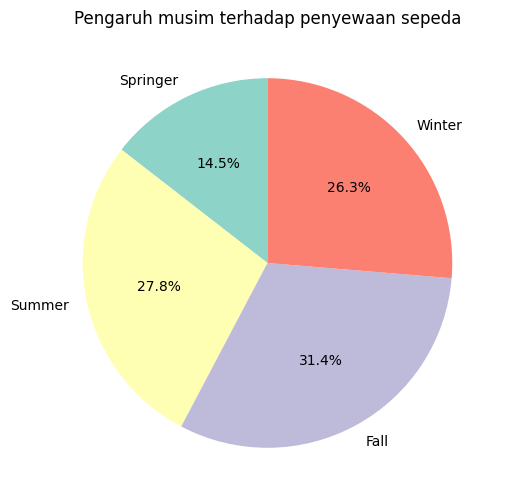

In [76]:
grouped_season_pie = day_df.groupby('season')['total_rentals_bikes'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.pie(grouped_season['total_rentals_bikes'],
        labels=['Springer', 'Summer', 'Fall', 'Winter'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Set3'))
plt.title('Pengaruh musim terhadap penyewaan sepeda')
plt.show()

### Pertanyaan 2: Bagaimana pengaruh dari penggunaan sepeda pada hari kerja dan akhir pekan ?

Bar chart dengan mengelompokkan berdasarkan hari kerja dengan total penyewaan sepeda, kemudian ditampilkan dengan rata rata dari penyewaan sepeda

<ipython-input-77-10cead0268cb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_workingday = day_df.groupby('workingday')['total_rentals_bikes'].mean().reset_index()


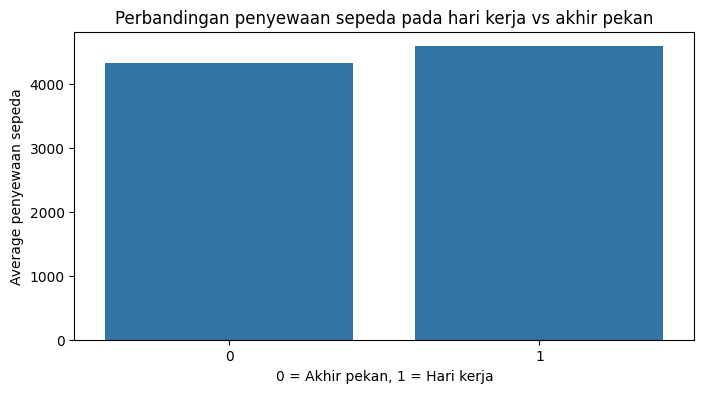

In [77]:
grouped_workingday = day_df.groupby('workingday')['total_rentals_bikes'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='workingday', y='total_rentals_bikes', data=grouped_workingday)
plt.title('Perbandingan penyewaan sepeda pada hari kerja vs akhir pekan')
plt.xlabel('0 = Akhir pekan, 1 = Hari kerja')
plt.ylabel('Average penyewaan sepeda')
plt.show()

Pie chart dengan mengelompokkan berdasarkan hari kerja dengan total penyewaan sepeda

<ipython-input-78-b9926f6e5751>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_workingday_pie = day_df.groupby('workingday')['total_rentals_bikes'].sum()


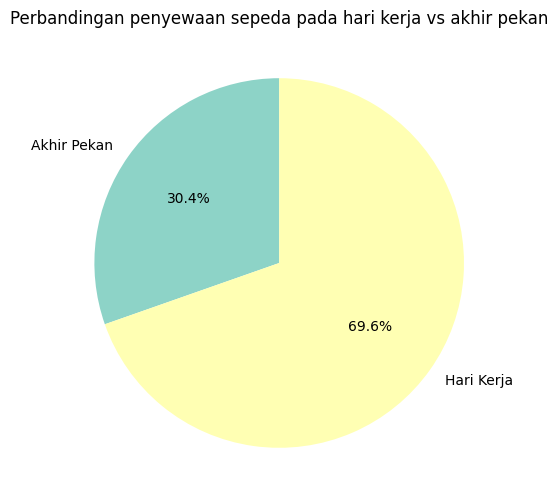

In [78]:
grouped_workingday_pie = day_df.groupby('workingday')['total_rentals_bikes'].sum()

plt.figure(figsize=(8,6))
plt.pie(grouped_workingday_pie, labels=['Akhir Pekan', 'Hari Kerja'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Perbandingan penyewaan sepeda pada hari kerja vs akhir pekan')
plt.show()

### Pertanyaan 3: Bagaimana performa penyewaan sepeda dari tahun 2011 hingga 2012 ?

Bar chart dengan mengelompokkan berdasarkan tahubn dengan total penyewaan sepeda, kemudian ditampilkan dengan rata rata dari penyewaan sepeda

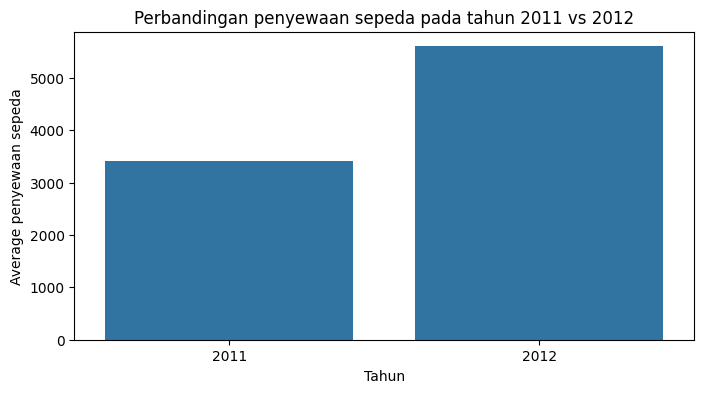

In [79]:
grouped_year = day_df.groupby('year')['total_rentals_bikes'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='year', y='total_rentals_bikes', data=grouped_year)
plt.title('Perbandingan penyewaan sepeda pada tahun 2011 vs 2012')
plt.xlabel('Tahun')
plt.ylabel('Average penyewaan sepeda')
plt.show()

Line chart dengan mengelompokkan berdasarkan tahun dan bulan dengan total penyewaan sepeda, kemudian ditampilkan dengan rata rata dari penyewaan sepeda

<ipython-input-80-0871f9fac96d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month_year = day_df.groupby(['year', 'month'])['total_rentals_bikes'].mean().reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


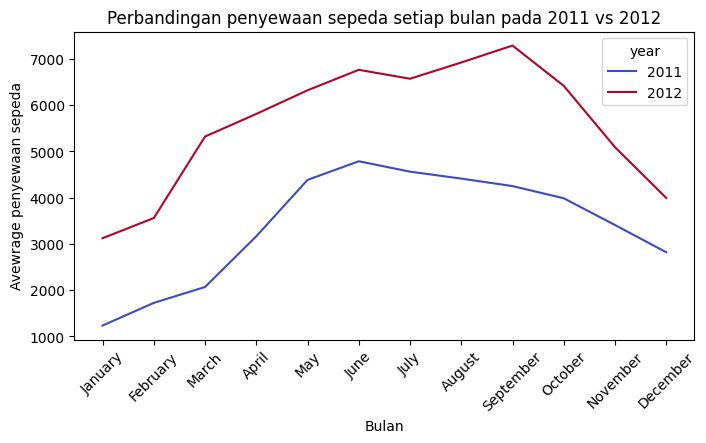

In [80]:
grouped_month_year = day_df.groupby(['year', 'month'])['total_rentals_bikes'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='month', y='total_rentals_bikes', hue='year', data=grouped_month_year,palette='coolwarm')
plt.title('Perbandingan penyewaan sepeda setiap bulan pada 2011 vs 2012')
plt.xlabel('Bulan')
plt.ylabel('Avewrage penyewaan sepeda')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Menggunakan barchart untuk mengelompokkan berdasarkan season, berdasarkan hari kerja, dan berdasarkan tahun
- Pie chart untuk mengelompokkan berdasarkan hari kerja dan akhir pekan
- Line chart mengelompokkan berdasarkan tahun dan bulan untuk melihat performa penyewaan sepeda

## Analisis Lanjutan (Opsional)

Pada dataset bike itu terdapat kolom suhu dalam celcius, sehingga bisa kita bagi bagi kategorinya dalam interval suhu

<ipython-input-81-c31db35761d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_group', y='total_rentals_bikes', data=day_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

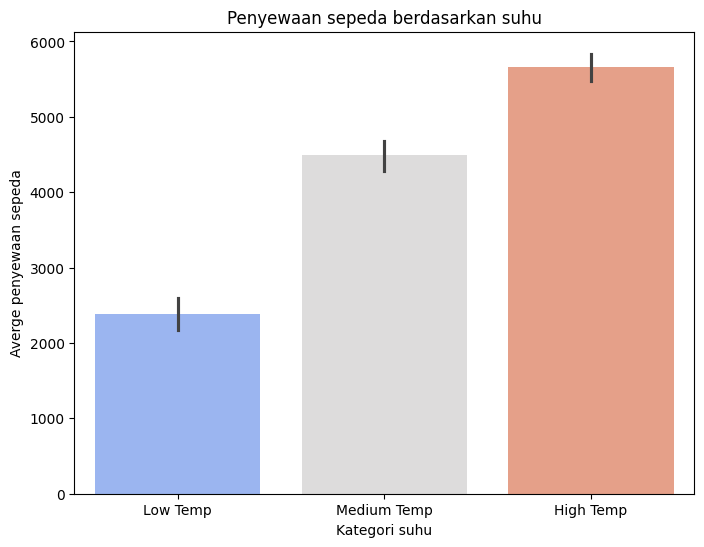

In [81]:
plt.figure(figsize=(8,6))
batas_bins = [0, 0.3, 0.6, 1.0]
kategori = ['Low Temp', 'Medium Temp', 'High Temp']
day_df['temp_group'] = pd.cut(day_df['temp'], bins=batas_bins, labels=kategori)

sns.barplot(x='temp_group', y='total_rentals_bikes', data=day_df, palette='coolwarm')
plt.title('Penyewaan sepeda berdasarkan suhu')
plt.xlabel('Kategori suhu')
plt.ylabel('Averge penyewaan sepeda')
plt.show()

## Conclusion

- Conclution pertanyaan 1 (Bagaimana pengaruh dari kondisi cuaca dan musim terhadap jumlah penyewaan sepeda ?) = Musim sangat berpengaruh terhadap jumlah penyewaan sepeda, khususnya pada musim spring dimana sangat rendah. Sedangkan yang lainnya ada peningkatan dan penurunan namun tidak terlalu melonjak jauh seperti yang ada di musim spring.

- Conclution pertanyaan 2 (Bagaimana pengaruh dari penggunaan sepeda pada hari kerja dan akhir pekan ?) = Sudah jelas bahwa hari kerja jumlah penyewaan sepeda lebih tinggi dari hari libur, mungkin bisa disebabkan sepeda tersebut dipakai untuk bekerja dan beraktivitas lainnya.

- Conclution pertanyaan 3 (Bagaimana performa penyewaan sepeda dari tahun 2011 hingga 2012 ?) = Penyewaan sepeda dari tahun 2012 lebih tinggi dibandingkan 2011, bahkan bisa dilihat dari peningkatan setiap bulannya pada tahun 2012 selalu lebih tinggi.


In [82]:
day_df.to_csv("day_new.csv", index=False)

In [83]:
hour_df.to_csv("hour_new.csv", index=False)